#Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib

#Load Dataset

In [4]:
# Kaggle/Plotly mirror link (Pima Indians Diabetes Dataset)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Explore Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std  

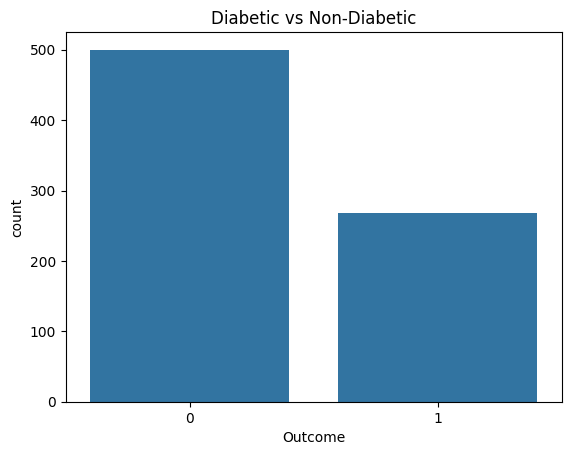

In [7]:
print(df.info())
print("\n==========================================================\n")
print(df.describe())
print("\n==========================================================\n")
print(df['Outcome'].value_counts())
print("\n==========================================================\n")
print(df.shape)
print("\n==========================================================\n")

# Plot outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetic vs Non-Diabetic")
plt.show()

In [8]:
# Handlemissing values
cols_zero_invalid = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols_zero_invalid:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Split Data & Scale

In [9]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Train Models

In [11]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    roc_auc = None
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("ROC AUC:", roc_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()



--- LogisticRegression ---
Accuracy: 0.7077922077922078
ROC AUC: 0.812962962962963
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:
 [[82 18]
 [27 27]]

--- RandomForest ---
Accuracy: 0.7792207792207793
ROC AUC: 0.8178703703703704
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

Confusion Matrix:
 [[87 13]
 [21 33]]

--- SVM ---
Accuracy: 0.7402597402597403
ROC AUC: 0.7963888

# Save Best Model

In [12]:
# Pick Random Forest (usually performs best)
best_model = models['RandomForest']

joblib.dump(best_model, 'diabetes_rf_model.pkl')
joblib.dump(scaler, 'diabetes_scaler.pkl')

print("Saved RandomForest model + scaler.")


Saved RandomForest model + scaler.
